In [93]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [94]:
seaborn.__version__

'0.9.0'

In [95]:
dataset = pandas.read_csv('./datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [96]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [97]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

dataset_numeric = dataset[important_cols].select_dtypes(include=['number'])

In [140]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


# 1. Estadísticos descriptivos

In [ ]:
# 1.1 - Rango de variables

In [99]:
for c in dataset[important_cols]._get_numeric_data():
    print(c + ': ' + str(dataset[c].min()) + ' - ' + str(dataset[c].max()))


year: 2008 - 2016
pf_identity_legal: 0.0 - 10.0
pf_identity_parental_marriage: 0.0 - 10.0
pf_identity_parental_divorce: 0.0 - 10.0
pf_identity_parental: 0.0 - 10.0
pf_identity_sex_male: 0.0 - 10.0
pf_identity_sex_female: 0.0 - 10.0
pf_identity_sex: 0.0 - 10.0
pf_identity_divorce: 0.0 - 10.0
pf_identity: 0.0 - 10.0
ef_score: 2.88 - 9.19
ef_rank: 1.0 - 162.0
hf_score: 3.765826877 - 9.126312939
hf_rank: 1.0 - 162.0


In [141]:
# 1.2 Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo 
# y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

In [100]:
#pf_identity del mundo
world_pf_identity = dataset['pf_identity']
#hf_score del mundo 
world_hf_score    = dataset['hf_score']   
#pf_identity de latinoamerica y el caribe
la_pf_identity = dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity']
#hf_score de latinoamerica y el caribe
la_hf_score = dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score']

In [101]:

print("Media de pf_identity del mundo: ",world_pf_identity.mean())
print("Media de pf_identity de latinoamerica y caribe: ",la_pf_identity.mean())
print("Media de hf_score del mundo: ",world_hf_score.mean())
print("Media de hf_score de latinoamerica y caribe: ",la_hf_score.mean())
print('---------------------------------------------------------')
print("Mediana de pf_identity del mundo: ",world_pf_identity.median())
print("Mediana de pf_identity de latinoamerica y caribe: ",la_pf_identity.median())
print("Mediana de hf_score del mundo: ",world_hf_score.median())
print("Mediana de hf_score de latinoamerica y caribe: ",la_hf_score.median())
print('---------------------------------------------------------')
print("Desviacion estandar de pf_identity del mundo: ",world_pf_identity.std())
print("Desviacion estandar de pf_identity de latinoamerica y caribe: ",la_pf_identity.std())
print("Desviacion estandar de hf_score del mundo: ",world_hf_score.std())
print("Desviacion estandar de hf_score de latinoamerica y caribe: ",la_hf_score.std())

#No tiene sentido calcular la moda ya que es muy difici que dos paises tengan los mismos indices.

Media de pf_identity del mundo:  7.33417997096807
Media de pf_identity de latinoamerica y caribe:  8.765086206909483
Media de hf_score del mundo:  6.9934437555145
Media de hf_score de latinoamerica y caribe:  7.047981929952582
---------------------------------------------------------
Mediana de pf_identity del mundo:  9.166666667000001
Mediana de pf_identity de latinoamerica y caribe:  10.0
Mediana de hf_score del mundo:  6.923840432999999
Mediana de hf_score de latinoamerica y caribe:  7.02804474
---------------------------------------------------------
Desviacion estandar de pf_identity del mundo:  3.159472661477449
Desviacion estandar de pf_identity de latinoamerica y caribe:  1.7117319741534658
Desviacion estandar de hf_score del mundo:  1.0258111611874141
Desviacion estandar de hf_score de latinoamerica y caribe:  0.6089040915687837


No tiene sentido calcular la moda ya que la misma al representar el valor mas repetido solo es aplicable para variables continuas


In [142]:
# 1.3 ¿Son todos los valores de pf_identity y hf_score directamente comparables? 
# ¿Qué otra variable podría influenciarlos?

Son variables directamente comparables. Podría ser influenciadas por variables como pais-sexo-edad.

In [ ]:
# 1.4 ¿Cómo pueden sanearse los valores faltantes?

Los datos pueden sanearse remplasando los faltantes por las medianas regionales ya que es mas probable que paises de una misma region tengan indices parecidos. Seria recomendable comprarar todas las desviaciones estandar de cada region.


In [102]:
for col in dataset_numeric:
    dataset_numeric[col] = dataset_numeric[col].fillna(dataset_numeric[col].mean())

En este caso hemos elegido la media de toda la columna, pero podría haberse reemplazado para cada región por la media de cada región por ejemplo.

In [144]:
# 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? 
# ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Los outliers pueden ser globales y por grupo en el siguiente ejemplo muestra cómo podemos identificar outliers globales, ya que no le indicamos al gráfico que agrupe por un atributo específico. Por lo cual identifica los outliers de acuerdo en base a la media de la variable.

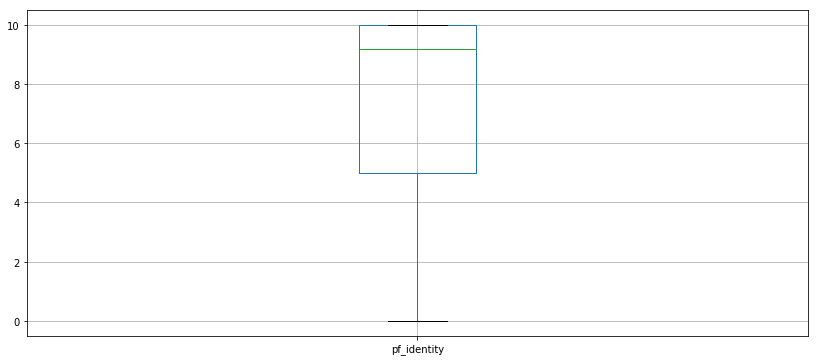

In [103]:
dataset[important_cols].boxplot(column='pf_identity', figsize=(14,6))
plt.show()

Por otra parte podemos definir un grupo con la misma variable pero esta vez agrupando por Year, de esta manera podemos detectar los outliers de acuerdo al atributo que le estamos indicando que agrupe.

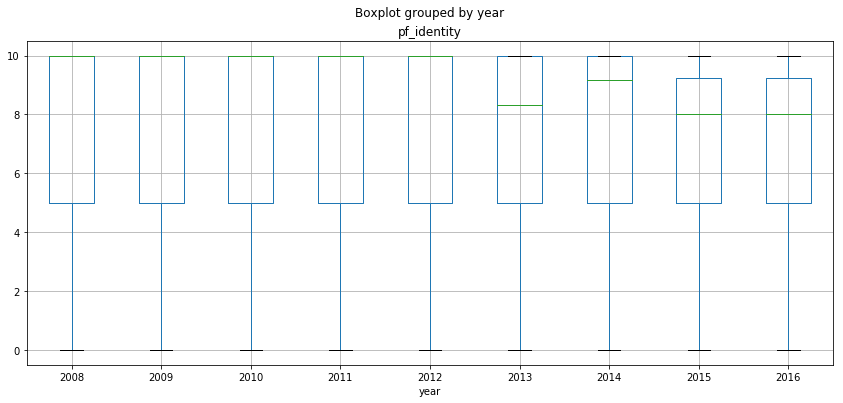

In [104]:
dataset[important_cols].boxplot(column='pf_identity',by='year', figsize=(14,6))
plt.show()

¿Encuentra outliers en estas dos variables? 

Podemos notar valores que están alejados significativamente de la media de la variable, los cuales pueden ser considerados como outliers si los mismos no representan valores significativos para el análisis.

## ¿Qué método utiliza para detectarlos?
Para detectar los Outliers generamos un gráfico de tipo boxplot con el cual pretendemos distinguir con solo la observación de los datos aquellos valores ubicados en los extremos superiores e inferiores como los outliers, dejando como valores válidos los que se encuentran en medio de los cuartiles superior e inferior.

# 2. Agregación de datos

In [145]:
# 2.1 Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

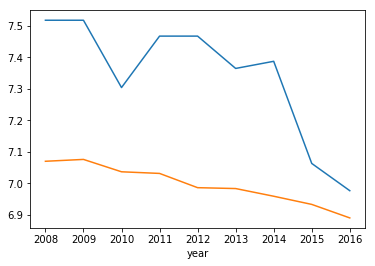

In [105]:
y1 = dataset[important_cols].groupby('year').agg('mean')['pf_identity']
y2 = dataset[important_cols].groupby('year').agg('mean')['hf_score']

seaborn.lineplot(x=y1.index, y=y1.values)
seaborn.lineplot(x=y2.index, y=y2.values)

In [146]:
# 2.2 Realicen los mismos gráficos, pero separando por regiones 
#(Cada variable en un gráfico distinto, sino no se ve nada). 
# ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [106]:
regions_pf_identity = pandas.DataFrame(dataset[important_cols].groupby(['year','region']).agg('mean')['pf_identity'])
regions_pf_identity.reset_index(inplace=True)

In [107]:
# regions

In [108]:
regions_pf_identity.region.unique()

array(['Caucasus & Central Asia', 'East Asia', 'Eastern Europe',
       'Latin America & the Caribbean', 'Middle East & North Africa',
       'North America', 'Oceania', 'South Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

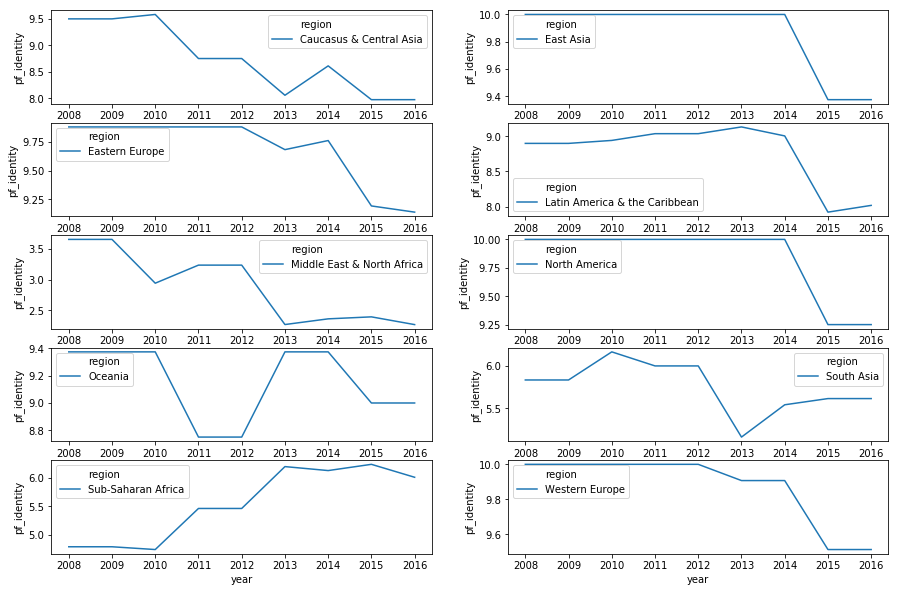

In [109]:
import math
chart, axs = plt.subplots(nrows=round(len(regions_pf_identity.region.unique())/2), ncols=2, figsize=(15,10))
for i, region in enumerate(regions_pf_identity.region.unique()):
    seaborn.lineplot(x='year', y='pf_identity', data=regions_pf_identity[regions_pf_identity['region'] == region], hue='region', ax=axs[math.floor(i/2), i%2])

In [110]:
regions_hf_score = pandas.DataFrame(dataset[important_cols].groupby(['year','region']).agg('mean')['hf_score'])
regions_hf_score.reset_index(inplace=True)

In [111]:
regions_hf_score.region.unique()

array(['Caucasus & Central Asia', 'East Asia', 'Eastern Europe',
       'Latin America & the Caribbean', 'Middle East & North Africa',
       'North America', 'Oceania', 'South Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

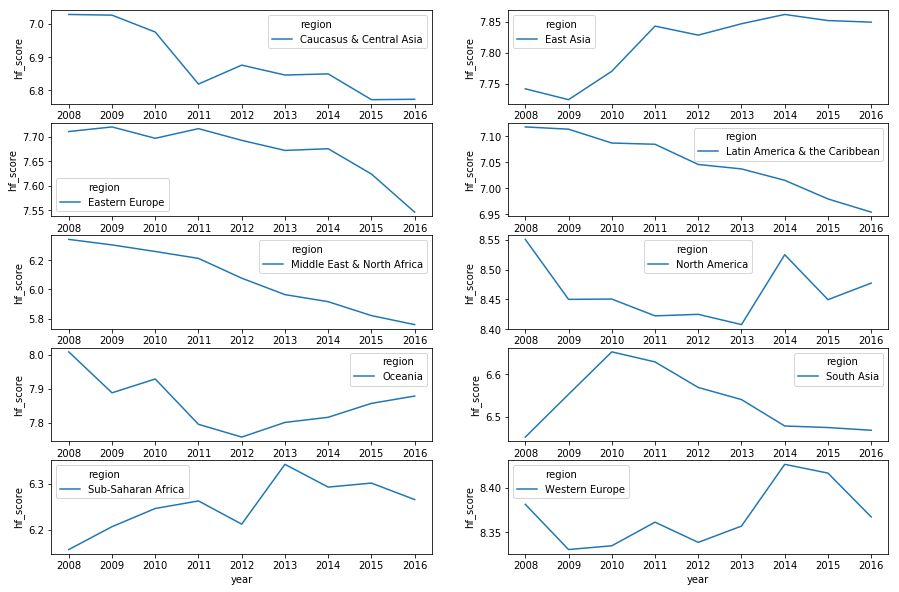

In [112]:
import math
chart, axs = plt.subplots(nrows=round(len(regions_hf_score.region.unique())/2), ncols=2, figsize=(15,10))
for i, region in enumerate(regions_hf_score.region.unique()):
    seaborn.lineplot(x='year', y='hf_score', data=regions_hf_score[regions_hf_score['region'] == region], hue='region', ax=axs[math.floor(i/2), i%2])

Para la variable pf_identity, de las distintas regiones, podemos observar que se asemeja mas a el gráfico mundial

Para la variable hf_score podemos observar que se mantiene a lo largo de los años. 

In [147]:
# 2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar 
# la tendencia de la variable pf_identity en la región. 
# ¿Cómo seleccionarion los países relevantes a esa tendencia?

In [156]:
latinoamerica = pandas.DataFrame(dataset[dataset['region'] == 'Latin America & the Caribbean'].groupby(['year','countries']).agg('mean')['pf_identity'])
latinoamerica.reset_index(inplace=True)

In [157]:
import random
countries_random = []

len_countries = len(latinoamerica.countries.unique())

for i in range(3):
    rnd = random.randint(0, len_countries)
    country = latinoamerica.countries.unique()[rnd]
    countries_random.append(country)

countries_random

['Belize', 'Bahamas', 'Guyana']

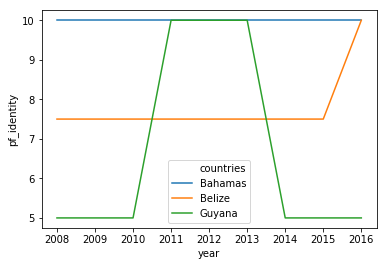

In [158]:
seaborn.lineplot(x='year', y='pf_identity', data=latinoamerica[latinoamerica['countries'].isin(countries_random)], hue='countries')

# 2. Distribuciones

In [ ]:
# 2.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica 
# y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde 
# cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

In [ ]:
dataset_lac = dataset.loc[dataset['region'] == 'Latin America & the Caribbean']

plt.figure(figsize=(10,6))
seaborn.distplot(dataset_lac['pf_identity'].dropna(), label='Latin America & the Caribbean')
seaborn.distplot(dataset['pf_identity'].dropna(), label='Global')
plt.legend()
seaborn.despine()

In [ ]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset_lac['hf_score'].dropna(), label='Latin America & the Caribbean')
seaborn.distplot(dataset['hf_score'].dropna(), label='Global')
plt.legend()
seaborn.despine()

Podemos decir a partir de los graficos que la variable pf_identity se asemeja a una distrubucion exponencial y hf_score distrución normal

2.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [114]:
from scipy import stats
import numpy as np
array_pf_identity = np.array(sorted(dataset['pf_identity']))
array_pf_identity = numpy.asarray([ h for h in array_pf_identity if not numpy.isnan(h) ])
print('Resultado test ks para pf_identity: ' + str(stats.kstest(array_pf_identity, 'norm')))

array_hf_score = np.array(sorted(dataset['hf_score']))
array_hf_score = numpy.asarray([ h for h in array_hf_score if not numpy.isnan(h) ])
print('Resultado test ks para hf_score: ' + str(stats.kstest(array_hf_score, 'norm')))

Resultado test ks para pf_identity: KstestResult(statistic=0.9146901895363428, pvalue=0.0)
Resultado test ks para hf_score: KstestResult(statistic=0.9999170006054449, pvalue=0.0)


Al obtener el pValue = 0.0 no podemos afirmar que pertenece a una distribucion normal

2.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a las distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

In [115]:
from scipy import stats

(7.334179970968086, 3.071509027270081)


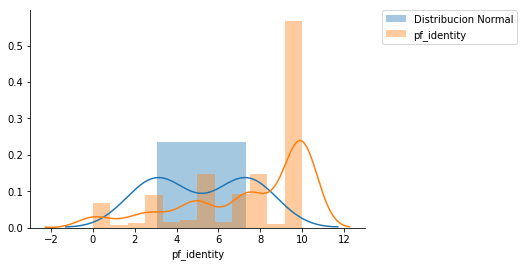

In [116]:
# para pf_identity
# ----------------
pf_identities = dataset['pf_identity']

# saneamos los datos para la columna 'pf_identity'
pf_identities = pf_identities.fillna(pf_identities.mean())

# igualamos nuestra distribución normal asignando los valores de Media y Desviacion Estandar
norm_dist = pf_identities.mean(),pf_identities.std()
print(norm_dist)
# indicamos nuestra Distribucion Normal.
seaborn.distplot(norm_dist,label='Distribucion Normal')
# indicamos la muestra de datos para la variable pf_identity.
seaborn.distplot(pf_identities, label='pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

In [117]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(pf_identities, percs)
qn_norm_dist = numpy.percentile(norm_dist, percs)

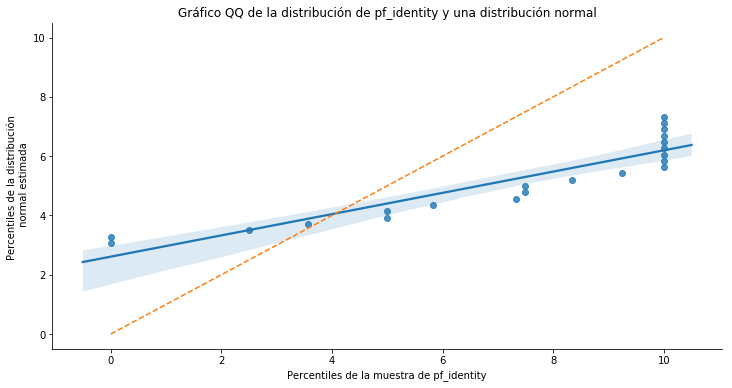

In [118]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, ls="--")

seaborn.despine()

(6.993443755514512, 0.9972513072444645)


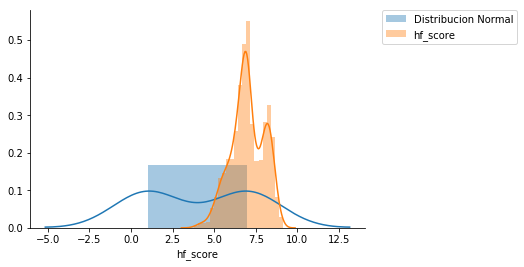

In [119]:
# para hf_score
# ----------------
hf_scores = dataset['hf_score']

# saneamos los datos para la columna 'pf_identity'
hf_scores = hf_scores.fillna(hf_scores.mean())

# igualamos nuestra distribución normal asignando los valores de Media y Desviacion Estandar
norm_dist = hf_scores.mean(), hf_scores.std()
print(norm_dist)
# indicamos nuestra Distribucion Normal.
seaborn.distplot(norm_dist,label='Distribucion Normal')
# indicamos la muestra de datos para la variable pf_identity.
seaborn.distplot(hf_scores, label='hf_score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

In [120]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(hf_scores, percs)
qn_norm_dist = numpy.percentile(norm_dist, percs)

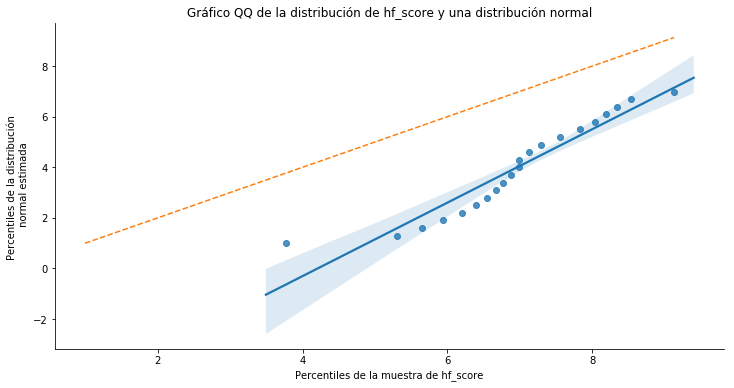

In [121]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, ls="--")

seaborn.despine()

2.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [122]:
#Asimetría 
pf_identities.skew(axis = 0, skipna = True) 
hf_scores.skew(axis = 0, skipna = True) 

#Curtosis 
pf_identities.kurtosis(axis = 0)
hf_scores.kurtosis(axis = 0)

-0.36277464094523726

# 3. Correlaciones

En este ejercicio queremos responder a las preguntas

Las libertades sociales y económicas, ¿van siempre de la mano?
¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?
Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación.

In [123]:
# 3.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables?
# ¿Es adecuado para los valores de pf_identity? ¿Por qué?

/home/adrian/anaconda3/envs/diplodatos/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/adrian/anaconda3/envs/diplodatos/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


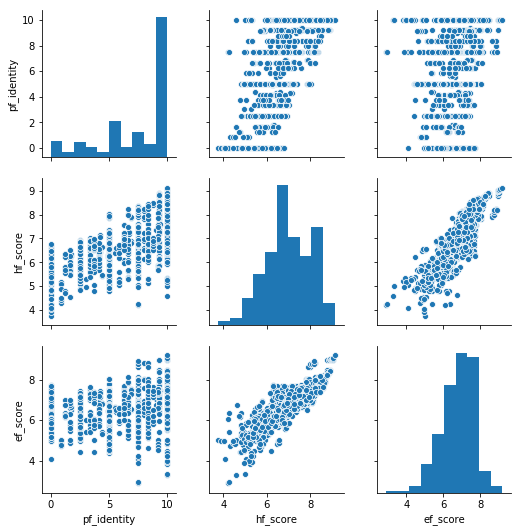

In [124]:
dataset_pairplot = dataset[['pf_identity', 'hf_score', 'ef_score']]
seaborn.pairplot(dataset_pairplot)

Conclusión: podemos observar que ef_score tiene correlación con hf_score y que pf_identity no tiene correlaciones

In [125]:
# 3.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, 
# ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, 
# sólo toma algunos valores. Es, en efecto, discreta.

<Figure size 720x432 with 0 Axes>

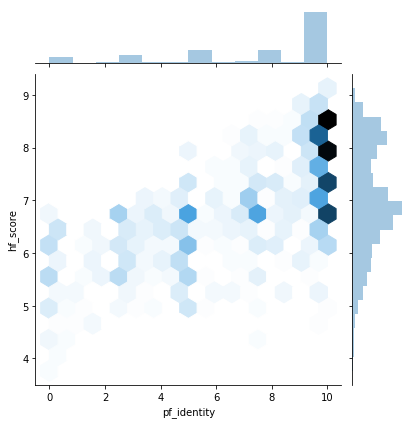

<Figure size 720x432 with 0 Axes>

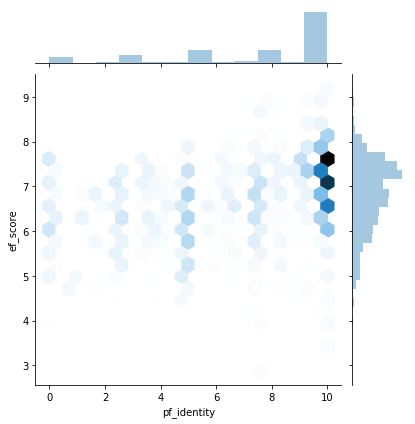

In [153]:
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset, x='pf_identity', y='hf_score', kind='hex')
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset, x='pf_identity', y='ef_score', kind='hex')

Conclusion: no hay correlación entre pf_identity y ef_score ni hf_score

In [154]:
# 3.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, 
# dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismos. 
# Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. 
# Interpretar los resultados y justificar si las variables están correlacionadas o no.

In [155]:
corrsperman = dataset['pf_identity'].corr(dataset['hf_score'], method='spearman')
print('La correlación de Sperman entre pf_identity y hf_score es: ' +  str(corrsperman))

La correlación de Sperman entre pf_identity y hf_score es: 0.6861094212039192


Esto indica que hay un cierto grado de correlacion entre hf_score y ef_score pero tan alta.